In [2]:
from ani_torch import TorchGraph, format_labels, trackable_function
import torch
!mkdir -p output

## Constructing a TorchGraph Object

We define a PyTorch function:

In [3]:
def func(x):
    y1 = torch.cos(x)
    y2 = torch.sin(x)
    y = y1 + y2
    
    return y

We construct a TorchGraph object that will capture the graph. We pass it our function and sample inputs at construction:

In [4]:
graph = TorchGraph(func, [2])

## Simple Plots

A simple plot of the graph can be displayed using the ``.plot`` method:

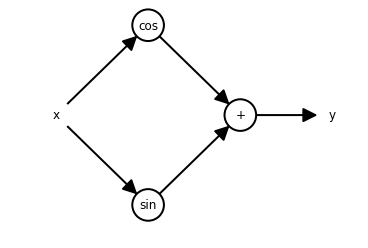

In [5]:
graph.plot()

In [ ]:
plt.savefig("output/graph_plot.eps", bbox_inches='tight', pad_inches=0)

We can also choose to plot the results of the forward pass:

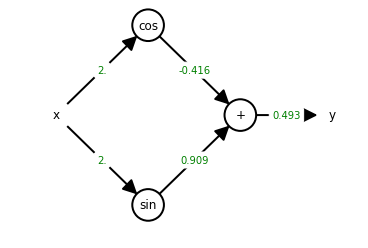

In [6]:
graph.plot(with_forward=True)

And the backward pass:

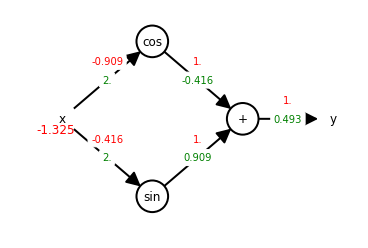

In [7]:
graph.plot(with_forward=True, with_backward=True, with_in_grad=True)

If we want to display more decimal numbers we can specify the precision:

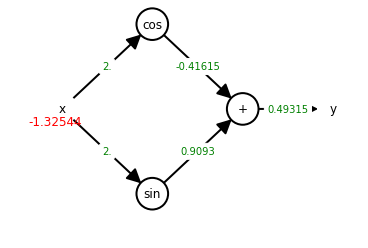

In [8]:
graph.plot(with_forward=True, with_backward=False, with_in_grad=True,
           num_label_precision=5)

## Animated Plots

We can also get an interactive animation of the forward and the backward run:

In [9]:
graph.animate(direction="forward")

In [10]:
graph.animate(direction="backward")

If we merely want to output the frames of the animation into files, we can instead run:

In [11]:
graph.save_images(
    direction="forward",
    image_filename_tpl="output/forward_{step}.eps",
)

In [12]:
graph.save_images(
    direction="backward",
    image_filename_tpl="output/backward_{step}.eps",
)

## Custom Functions

In [13]:
@trackable_function
class Sigmoid(torch.autograd.Function):
    name = '$\sigma$'
    
    @staticmethod
    def forward(ctx, x):
        y = 1 / (1 + torch.exp(-x))
        ctx.save_for_backward(y)
        return y

    @staticmethod
    def backward(ctx, grad_output):
        y, = ctx.saved_tensors
        grad_input = y * (1 - y) * grad_output
        return grad_input

sigmoid = Sigmoid.apply

In [14]:
def func(x):
    y = sigmoid(x)
    return y

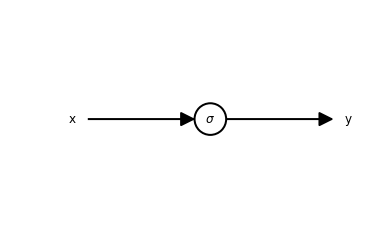

In [15]:
graph = TorchGraph(func, [2])
graph.plot()